In [3]:
!pip install Eon

     |████████████████████████████████| 113 kB 5.2 MB/s 
  Created wheel for Eon: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=afa54d952678c701403b2e7a7fd5b270af7d620ba42c4cf37150e7d00d8cc618
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built Eon


In [4]:
import networkx as nx
import csv
import EoN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
G=nx.read_adjlist('nodesv4.csv', delimiter = ',')

In [ ]:
df = pd.read_csv('edgesv3.csv')
E = nx.from_pandas_edgelist(df, source='SOURCE', target='TARGET',  create_using=None)

print(df)

      SOURCE TARGET
0        AER    KZN
1        ASF    KZN
2        ASF    MRV
3        CEK    KZN
4        CEK    OVB
...      ...    ...
67658    WYA    ADL
67659    DME    FRU
67660    FRU    DME
67661    FRU    OSS
67662    OSS    FRU

[67663 rows x 2 columns]


In [ ]:
#pos = nx.circular_layout(E)
#nx.draw(E,pos, node_size=300)
print(len(E))

3425


Text(0, 0.5, 'Nodes')

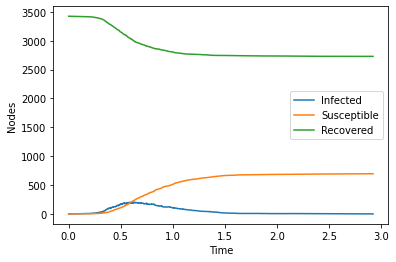

In [ ]:
initial_size = len(E)
gamma = 5 #recovery
tau = 0.3 #infection
t, S, I, R = EoN.fast_SIR(E, tau, gamma,
                            initial_infecteds = 'WUH')

plt.plot(t,I)   
plt.plot(t,R)
plt.plot(t,S)
plt.legend(['Infected', 'Susceptible', 'Recovered'])
plt.xlabel('Time')
plt.ylabel('Nodes')                         

Text(0, 0.5, 'Nodes')

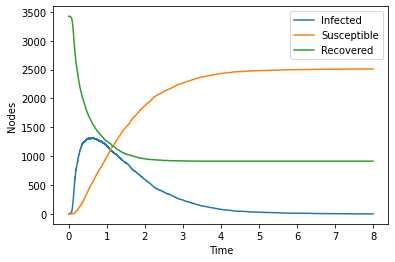

In [ ]:
initial_size = len(E)
gamma = 1.
tau = 1
t, S, I, R = EoN.fast_SIR(E, tau, gamma,
                            initial_infecteds = 'WUH')

plt.plot(t,I)   
plt.plot(t,R)
plt.plot(t,S)
plt.legend(['Infected', 'Susceptible', 'Recovered'])
plt.xlabel('Time')
plt.ylabel('Nodes')                           

Text(0, 0.5, 'Nodes')

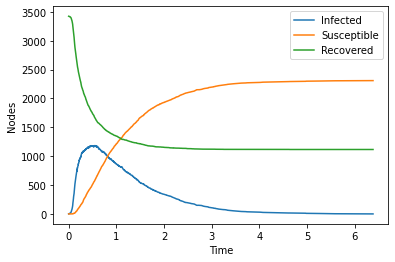

In [ ]:
initial_size = len(E)
gamma = 1.3
tau = 1
t, S, I, R = EoN.fast_SIR(E, tau, gamma,
                            initial_infecteds = 'WUH')

plt.plot(t,I)   
plt.plot(t,R)
plt.plot(t,S)
plt.legend(['Infected', 'Susceptible', 'Recovered'])
plt.xlabel('Time')
plt.ylabel('Nodes')                         

In [ ]:
a = []
initial_size = 100
for i in range(initial_size):
  initial_size = len(E)
  gamma = 0
  tau = 1
  a.append(EoN.fast_SIR(E, tau, gamma, initial_infecteds = 'WUH', return_full_data = True))





In [ ]:
print(list(E.nodes))

['AER', 'KZN', 'ASF', 'MRV', 'CEK', 'OVB', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'LED', 'SVX', 'NJC', 'NUX', 'BTK', 'IKT', 'HTA', 'KCK', 'ODO', 'UKX', 'ULK', 'YKS', 'MJZ', 'AYP', 'LIM', 'CUZ', 'PEM', 'HUU', 'IQT', 'PCL', 'TPP', 'ABJ', 'BOY', 'OUA', 'ACC', 'BKO', 'DKR', 'COO', 'LFW', 'NIM', 'BOG', 'GYE', 'UIO', 'CLO', 'SCY', 'OCC', 'BDS', 'ZRH', 'BOD', 'BRS', 'GVA', 'LPA', 'LCA', 'RMF', 'TFS', 'AJR', 'LYC', 'ARN', 'GEV', 'HAD', 'JKG', 'KRF', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VBY', 'VHM', 'VXO', 'HMV', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KOZ', 'OLH', 'KZB', 'SYB', 'KYK', 'ORI', 'KPR', 'BSO', 'MNL', 'BXU', 'CBO', 'CGY', 'CRM', 'DGT', 'DWC', 'GES', 'KLO', 'LGP', 'MPH', 'OZC', 'PPS', 'RXS', 'SUG', 'TUG', 'ZAM', 'AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTN', 'KTB', 'MTM', 'LOS', 'ROB', 'BCN', 'BJL', 'FNA', 'CKY', 'OXB', 'DLA'

In [ ]:
Node_list = list(E.nodes)
remove_wuh = Node_list.index('WUH')
Node_list.remove('WUH')

In [ ]:
Degree = list(E.degree())

print(Degree[remove_wuh])
Degree.pop(remove_wuh)
print(Degree[remove_wuh])
print(Node_list[remove_wuh])

('WUH', 66)
('WUX', 19)
WUX


In [ ]:
average_time = []
for k in range(len(Node_list)):
  sum = 0
  for i in range(len(a)):
    if len(a[i].node_history(Node_list[k])[0]) == 2:
      sum = sum + a[i].node_history(Node_list[k])[0][1]
    else:
      sum = sum + 0
  avg = sum/len(a)
  average_time.append([Node_list[k], avg, Degree[k][1]])

print(average_time)


[['AER', 0.2132463988980118, 18], ['KZN', 0.19865565718698022, 21], ['ASF', 0.2768428701891119, 7], ['MRV', 0.2007587188941666, 16], ['CEK', 0.22481650773896406, 14], ['OVB', 0.14643517157861324, 53], ['DME', 0.12209241781118983, 190], ['NBC', 0.2776025303332554, 7], ['TGK', 1.0998466424938884, 1], ['UUA', 0.4781925038420065, 3], ['EGO', 0.272825832719114, 9], ['KGD', 0.24950758323102637, 10], ['GYD', 0.1439200865716628, 39], ['LED', 0.13001388378956627, 113], ['SVX', 0.1410082424655291, 67], ['NJC', 0.296535372127977, 9], ['NUX', 0.2579193168541734, 10], ['BTK', 0.3533176821407498, 4], ['IKT', 0.18473158097601836, 28], ['HTA', 0.3009091634767547, 9], ['KCK', 1.2642482103608836, 1], ['ODO', 0.9859805167351082, 1], ['UKX', 1.1139285188669625, 1], ['ULK', 0.7564621961649852, 2], ['YKS', 0.21198313191744106, 23], ['MJZ', 0.35734992871417104, 6], ['AYP', 1.3250352643920558, 1], ['LIM', 0.16183879609809015, 57], ['CUZ', 0.5816757982828819, 5], ['PEM', 0.85629422809149, 2], ['HUU', 1.0907809

In [ ]:
Data = pd.DataFrame(average_time,columns=['Airport','Infection avg','Degree'])
print(Data)

     Airport  Infection avg  Degree
0        AER       0.213246      18
1        KZN       0.198656      21
2        ASF       0.276843       7
3        MRV       0.200759      16
4        CEK       0.224817      14
...      ...            ...     ...
3419     WIN       1.039887       2
3420     LSY       1.305814       1
3421     MIM       0.636603       3
3422     MYA       0.718515       2
3423     OAG       1.078009       1

[3424 rows x 3 columns]


[0.2132463988980118, 0.19865565718698022, 0.2768428701891119, 0.2007587188941666, 0.22481650773896406, 0.14643517157861324, 0.12209241781118983, 0.2776025303332554, 1.0998466424938884, 0.4781925038420065, 0.272825832719114, 0.24950758323102637, 0.1439200865716628, 0.13001388378956627, 0.1410082424655291, 0.296535372127977, 0.2579193168541734, 0.3533176821407498, 0.18473158097601836, 0.3009091634767547, 1.2642482103608836, 0.9859805167351082, 1.1139285188669625, 0.7564621961649852, 0.21198313191744106, 0.35734992871417104, 1.3250352643920558, 0.16183879609809015, 0.5816757982828819, 0.85629422809149, 1.0907809728629863, 0.5993298596689146, 0.7528054476954403, 0.696110785097093, 0.2054476719679859, 0.6903576487933638, 0.21969508918147998, 0.17339058245896888, 0.21793753723375253, 0.1726491875652437, 0.20989547742038966, 0.2275165803026963, 0.2631585435621385, 0.15566749124907597, 0.21465310977607963, 0.20186066758986257, 0.2508273287004259, 1.1322874199689656, 1.0011056384846766, 0.18483

Text(0, 0.5, 'Degree')

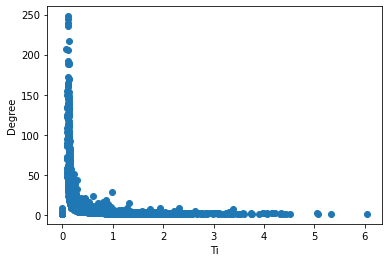

In [ ]:
T = []
d = []
for i in range(len(average_time)):
  T.append(average_time[i][1])
  d.append(average_time[i][2][1])

print(T)
print(d)

plt.scatter(T,d)
plt.xlabel('Ti')
plt.ylabel('Degree') 

In [7]:
#node_removal_analysis
df2 = pd.read_csv('edgesv3.csv')
df2['weight'] = df2.groupby(['SOURCE', 'TARGET'])['SOURCE'].transform('size')

G = nx.from_pandas_edgelist(df2, 'SOURCE', 'TARGET',
                            create_using=nx.DiGraph(), edge_attr='weight')

df3 = nx.to_pandas_edgelist(G)
remove_n = round(0.05 * len(df2))
drop_indices = np.random.choice(df2.index, remove_n, replace=False)
df_subset = df2.drop(drop_indices)
#nodes_list[551]
print(len(G))

3425


In [14]:
#NODE REMOVAL ANALYSIS
#PART 1

#5%
from random import seed
from random import randint
seed(2)
nodes_list = np.array(list(G.nodes()))
five_per = round(0.05 * len(G))
nodes_to_remove = []
for x in range(0, five_per):
  n = randint(1, len(G))
  remove = nodes_list[n]
  nodes_to_remove.append(remove)


nodes= G.copy()
nodes.remove_nodes_from(nodes_to_remove)
len(nodes)


3261

In [20]:
#10%
nodes_list = np.array(list(G.nodes()))
ten_per = round(0.10 * len(G))
nodes_to_remove = []
for x in range(0, ten_per):
  n = randint(1, len(G))
  remove = nodes_list[n]
  nodes_to_remove.append(remove)


nodes= G.copy()
nodes.remove_nodes_from(nodes_to_remove)
len(nodes)

3096

In [16]:
#15%
nodes_list = np.array(list(G.nodes()))
ften_per = round(0.15 * len(G))
nodes_to_remove = []
for x in range(0, ften_per):
  n = randint(1, len(G))
  remove = nodes_list[n]
  nodes_to_remove.append(remove)


nodes= G.copy()
nodes.remove_nodes_from(nodes_to_remove)
len(nodes)

2951

In [17]:
#20%

nodes_list = np.array(list(G.nodes()))
twen_per = round(0.2 * len(G))
nodes_to_remove = []
for x in range(0, twen_per):
  n = randint(1, len(G))
  remove = nodes_list[n]
  nodes_to_remove.append(remove)


nodes= G.copy()
nodes.remove_nodes_from(nodes_to_remove)
len(nodes)

2796

In [18]:
#25%


nodes_list = np.array(list(G.nodes()))
ftwen_per = round(0.25 * len(G))
nodes_to_remove = []
for x in range(0, ftwen_per):
  n = randint(1, len(G))
  remove = nodes_list[n]
  nodes_to_remove.append(remove)


nodes= G.copy()
nodes.remove_nodes_from(nodes_to_remove)
len(nodes)

2660

In [19]:
#30%


nodes_list = np.array(list(G.nodes()))
thirty_per = round(0.3 * len(G))
nodes_to_remove = []
for x in range(0, thirty_per):
  n = randint(1, len(G))
  remove = nodes_list[n]
  nodes_to_remove.append(remove)


nodes= G.copy()
nodes.remove_nodes_from(nodes_to_remove)
len(nodes)

2542